In [1]:
import pandas as pd
import numpy as np
import itertools

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

from imblearn.over_sampling import SMOTE, ADASYN

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Predicting Credit Card Fraud
Load the **creditcard.csv** file, split into training and test sets, and fit a logistic regression model to the training data.  
Then plot the ROC curve and confusion matrix for your test sets.

In [2]:
# here we load a compressed csv file.
df = pd.read_csv('creditcard.csv.gz')
# inspect the first few lines
df.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Count the number of instances in each class

In [4]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

Seperate the class column (`y`) from the rest of the data set (`X`) and use `train_test_split()` to create a train and a test set.

In [5]:
X = df[df.columns[:-1]]
y = df.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Use `scikit-learn`s `LogisticRegression()` and get the true positive rate, false positive rate and thresholds using `roc_curve()`.

In [22]:
logreg = LogisticRegression(fit_intercept=False)
y_score = logreg.fit(X_train,y_train).decision_function(X_test)
# get tpr, fpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_score)

Create an ROC plot using seaborn.

AUC: 0.9244314078575917


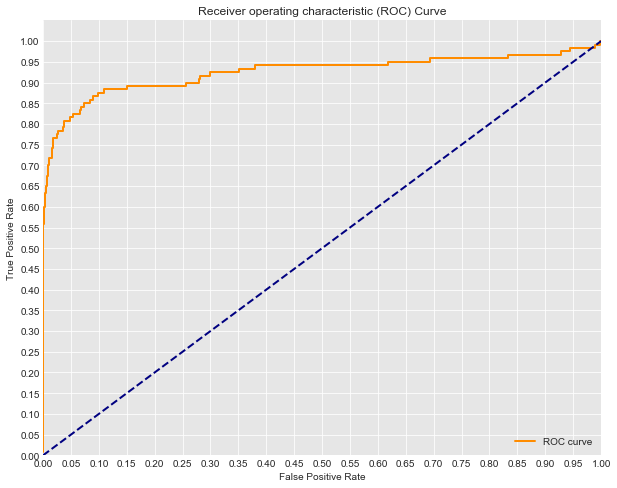

In [23]:
# Create seaborn plot here
#Seaborns Beautiful Styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [25]:
# Plot a confusion matrix here.
y_hat_test = logreg.predict(X_test)
confusion_matrix(y_test,y_hat_test)

array([[71034,    48],
       [   53,    67]])

In [39]:
#Create a function for a confusion matrix here. Make sure to add a normalization option
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    print(cm)
    plt.imshow(cm,cmap)
    
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    thresh = cnf_matrix.max() / 2.
    
    #Add a Side Bar Legend Showing Colors
    plt.colorbar()
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")


make `y_hat_test` predictions and create the confusion matrix using `confusion_matrix`. Then use your newly created function.

Confusion matrix, without normalization
[[71034    48]
 [   53    67]]


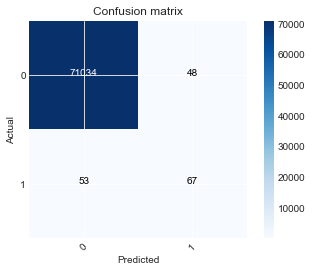

In [40]:
y_hat_test = logreg.predict(X_test)
cnf_matrix = confusion_matrix(y_test,y_hat_test)
# use new plot_confusion_matrix() function

plot_confusion_matrix(cnf_matrix,classes=[0,1])

# Tuning 
Try some of the various techniques proposed to tune your model. Compare your models using AUC, ROC or another metric. Use different values for normalization weights first and visualize the results.

AUC for 0.001: 0.8363887247591982
AUC for 0.01: 0.9235952843195183
AUC for 0.1: 0.9351174230700693
AUC for 1: 0.9244314078575917
AUC for 10: 0.9305581347364077
AUC for 100: 0.9263824409367585


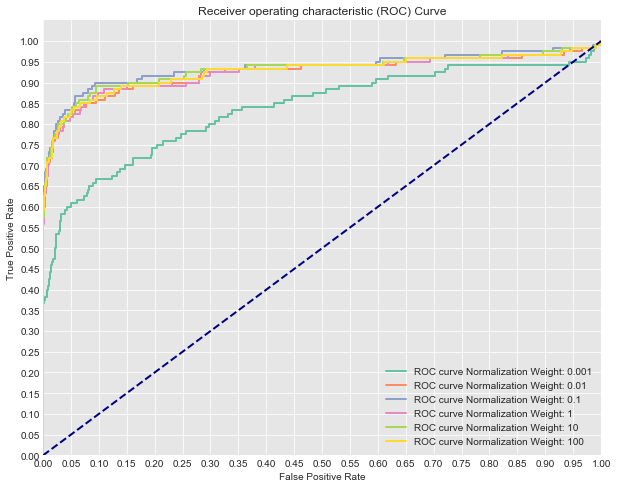

In [42]:
# Now let's compare a few different regularization performances on the dataset:
C_param_range = [0.001,0.01,0.1,1,10,100]
names = [0.001,0.01,0.1,1,10,100]
colors = sns.color_palette("Set2")

plt.figure(figsize=(10,8))

for n, c in enumerate(C_param_range):
    logreg = LogisticRegression(fit_intercept=False, C=c)
    model_log = logreg.fit(X_train,y_train)
    
    y_hat_test = model_log.predict(X_test)
    
    y_score = model_log.decision_function(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test,y_score)
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve Normalization Weight: {}'.format(names[n]))
    
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### SMOTE
Repeat what you did before but now using the SMOTE class from the imblearn package in order to improve the model's performance on the minority class.

In [44]:
print(y_train.value_counts()) #Previous original class distribution
# Resample X_train and y_train here
X_train_resampled, y_train_resampled = SMOTE().fit_sample(X_train,y_train)
print(pd.Series(y_train_resampled).value_counts()) #Preview synthetic sample class distribution

0    213233
1       372
Name: Class, dtype: int64
1    213233
0    213233
dtype: int64


AUC for 0.005: 0.9671522560798326
AUC for 0.1: 0.967057412565769
AUC for 0.2: 0.9670965692205247
AUC for 0.5: 0.9688956651004006
AUC for 0.8: 0.9715853990227248
AUC for 1: 0.9689793712426025
AUC for 1.25: 0.9686643594721589
AUC for 1.5: 0.9718004089174006
AUC for 2: 0.9689194639055363


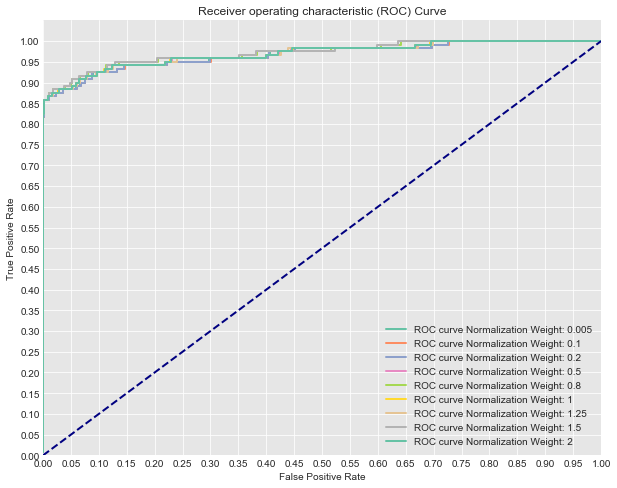

In [45]:
# Now let's compare a few different regularization performances on the dataset using SMOTE
C_param_range = [0.005, 0.1, 0.2, 0.5, 0.8, 1, 1.25, 1.5, 2]
names = [0.005, 0.1, 0.2, 0.5, 0.8, 1, 1.25, 1.5, 2]
colors = sns.color_palette("Set2", n_colors=len(names))

plt.figure(figsize=(10,8))

for n, c in enumerate(C_param_range):
    #Fit a model
    logreg = LogisticRegression(fit_intercept = False, C = c) #Starter code
    model_log = logreg.fit(X_train_resampled, y_train_resampled)
    #print(model_log) #Preview model params

    #Predict
    y_hat_test = logreg.predict(X_test)

    y_score = logreg.fit(X_train_resampled, y_train_resampled).decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve Normalization Weight: {}'.format(names[n]))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# plot the result

## Analysis
Describe what is misleading about the AUC score and ROC curves produced by this code [Teacher: only give code once students are done with previous questions]

0    284315
1       492
Name: Class, dtype: int64
1    284315
0    284315
dtype: int64
AUC for 0.005: 0.9940065468981567
AUC for 0.1: 0.991626819125206
AUC for 0.2: 0.9916828405471358
AUC for 0.3: 0.9915854676240843
AUC for 0.5: 0.9916406450529991
AUC for 0.6: 0.9874400484683812
AUC for 0.7: 0.9872654127747993
AUC for 0.8: 0.9913341780067157


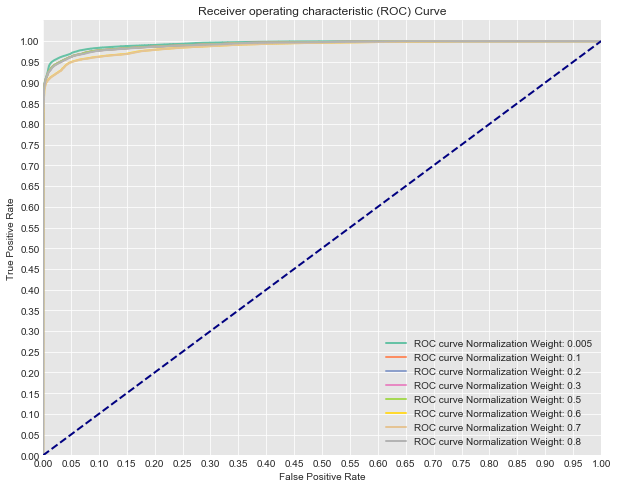

In [46]:
print(y.value_counts()) #Previous original class distribution
X_resampled, y_resampled = SMOTE().fit_sample(X, y) 
print(pd.Series(y_resampled).value_counts()) #Preview synthetic sample class distribution

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=0)

# Now let's compare a few different regularization performances on the dataset:
C_param_range = [0.005, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8]
names = [0.005, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9]
colors = sns.color_palette("Set2", n_colors=len(names))

plt.figure(figsize=(10,8))

for n, c in enumerate(C_param_range):
    #Fit a model
    logreg = LogisticRegression(fit_intercept = False, C = c) #Starter code
    model_log = logreg.fit(X_train, y_train)
    #print(model_log) #Preview model params

    #Predict
    y_hat_test = logreg.predict(X_test)

    y_score = logreg.fit(X_train, y_train).decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve Normalization Weight: {}'.format(names[n]))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**
This ROC curve is misleading because the test set was also manipulated using SMOTE. This produces results that will not be comparable to future cases as we have synthetically created test cases. SMOTE should only be applied to training sets, and then from there an accuracte gauge can be made on the model's performance by using a raw test sample that has not been oversampled or undersampled.**